# Normalized Tasks -- Functional Level Comparision

This notebook computes significance for the Normalized Task (Non-Opus Tasks) score for the following:
1. Electric Hook Type TD
    * vs. all types of Electric Hand
    * vs. Electric single grip hand
    * vs. body-powered TD
    * vs. Electric multi-articulating hand
2. Motion Control ETD
    * vs. electric hooks
3. Multi-articulating hands    
    * vs. Electric single grip hand
    * vs. Body-powered TD
4. Check T-tests
    * Anova
    * Tukey
5. Compare scores on normalized tasks among brands and number of respondents

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from driverCleanData import cleanData
%matplotlib inline
[sht,_] = cleanData();

There are 0 duplicates


The tasks we are considering are

In [34]:
from vectorSubsets import taskFull
print(taskFull[20:28])

['GrabObjectsWetEnvironment', 'GrabObjectsDirtyEnvironment', 'UseFingerTips', 'CanYouParticipateArtsCrafts', 'CanYouParticipateInHobbies', 'GoRidingMotorcycleATVetc', 'ParticipateOutdoorActivities', 'PerformHomeImprovement']


Let's look at the summary stats for all the data on the normalized tasks.

In [35]:
print(sht.normalizedTask.dropna().describe())

count    1212.000000
mean        3.047572
std         0.435905
min         1.571429
25%         2.750000
50%         3.000000
75%         3.250000
max         4.000000
Name: normalizedTask, dtype: float64


The normalization process means that the scores on the tasks are only counted if the respondent performs the task with their prosthesis.  The maxiumum score is a 4 and implies that the respondent finds the tasks easy with their device.

## Electric Hook TD
### vs. all types of Electric Hand



In [2]:
from vectorSubsets import electricHooks, electricHandMA, electricHandSG
print("Electric hooks are: {0}".format(electricHooks))
print()
print("Electric hands - multi articulating are {0}".format(electricHandMA))
print()
print("Electric hands - single grip are {0}".format(electricHandSG))

Electric hooks are: ['Motion Control (MC) ETD', 'Otto Bock Axon Hook', 'Otto Bock Greifer']

Electric hands - multi articulating are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

Electric hands - single grip are ['Motion Control (MC) Hand', 'Otto Bock Hand']


In [3]:
sht["TaskEHo"] = sht.normalizedTask[sht["PrimaryTerminalDevice"].isin(electricHooks)]
sht["TaskAllEHa"] = sht.normalizedTask[sht["PrimaryTerminalDevice"].isin(electricHandMA or electricHandSG)]

#### Summary Stats

First up the electric hooks

In [4]:
sht.TaskEHo.dropna().describe()

count    114.000000
mean       2.946773
std        0.391915
min        2.000000
25%        2.750000
50%        3.000000
75%        3.093750
max        4.000000
Name: TaskEHo, dtype: float64

Now for the electric hands

In [5]:
sht.TaskAllEHa.dropna().describe()

count    279.000000
mean       3.028136
std        0.358486
min        2.000000
25%        2.750000
50%        3.000000
75%        3.250000
max        4.000000
Name: TaskAllEHa, dtype: float64


#### Histogram


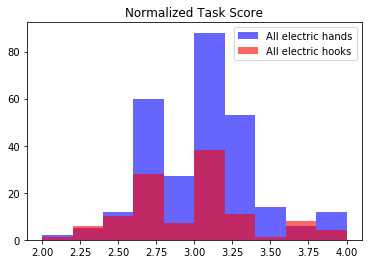

In [31]:
plt.hist(sht.TaskAllEHa.dropna(), alpha=0.6, color='b', label = "All electric hands")
plt.hist(sht.TaskEHo.dropna(), alpha=0.6, color='r', label = "All electric hooks")
plt.title("Normalized Task Score")
plt.legend()
plt.show()

In [7]:
stats.ttest_ind(sht.TaskAllEHa.dropna(), sht.TaskEHo.dropna())

Ttest_indResult(statistic=1.9865381765195675, pvalue=0.047671245003818315)

The higher mean score on the normalized tasks for the electric hands is significant.

## vs. Electric single grip hand

In [8]:
sht["TaskElecSG"] = sht.normalizedTask[sht["PrimaryTerminalDevice"].isin(electricHandSG)]
print("The types of devices we are considering as electric hands are {0}".format(electricHandSG))
print()
print("The mean of the electric hooks Task is {0}".format(sht.TaskEHo.dropna().mean()))
print()
print("The summary stats for the single grip are")
print(sht.TaskElecSG.dropna().describe())

The types of devices we are considering as electric hands are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The mean of the electric hooks Task is 2.946773182957393

The summary stats for the single grip are
count    604.000000
mean       3.099135
std        0.469637
min        2.000000
25%        2.750000
50%        3.000000
75%        3.333333
max        4.000000
Name: TaskElecSG, dtype: float64


In [9]:
stats.ttest_ind(sht.TaskEHo.dropna(), sht.TaskElecSG.dropna())

Ttest_indResult(statistic=-3.2559968034549294, pvalue=0.0011831605382561048)

The single grips higher score on the normalized tasks is significant.

#### Histograms


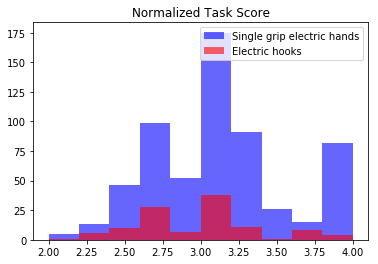

In [37]:
plt.hist(sht.TaskElecSG.dropna(), color='b', alpha=0.6, label = "Single grip electric hands")
plt.hist(sht.TaskEHo.dropna(), color='r', alpha=0.6, label = "Electric hooks")
plt.title("Normalized Task Score")
plt.legend()
plt.show()

## vs. Body Powered Hooks

In [11]:
from vectorSubsets import bodyPoweredHooks
sht["TaskBPHook"] = sht.normalizedTask[sht["PrimaryTerminalDevice"].isin(bodyPoweredHooks)]
sht.TaskBPHook.dropna().describe()

count    183.000000
mean       2.969659
std        0.424145
min        2.000000
25%        2.625000
50%        2.875000
75%        3.125000
max        4.000000
Name: TaskBPHook, dtype: float64

In [12]:
stats.ttest_ind(sht.TaskEHo.dropna(), sht.TaskBPHook.dropna())

Ttest_indResult(statistic=-0.46544563120854221, pvalue=0.64195578235207362)

Can't reject the null at alpha=0.05

## vs. Multi-articulating Hands

In [13]:
from vectorSubsets import electricHandMA
sht["TaskMA"] = sht.normalizedTask[sht["PrimaryTerminalDevice"].isin(electricHandMA)]
print("The mean of the electric hooks Task is {0}".format(sht.TaskEHo.dropna().mean()))
print()
print("The summary stats for multi-articulating are:")
print(sht.TaskMA.dropna().describe())

The mean of the electric hooks Task is 2.946773182957393

The summary stats for multi-articulating are:
count    279.000000
mean       3.028136
std        0.358486
min        2.000000
25%        2.750000
50%        3.000000
75%        3.250000
max        4.000000
Name: TaskMA, dtype: float64


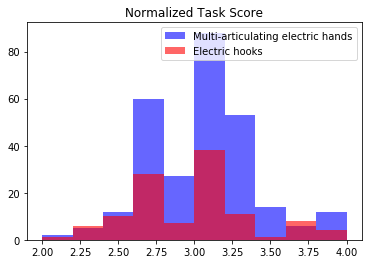

In [36]:
plt.hist(sht.TaskMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating electric hands")
plt.hist(sht.TaskEHo.dropna(), alpha=0.6, color='r', label = "Electric hooks")
plt.title("Normalized Task Score")
plt.legend()
plt.show()

In [15]:
stats.ttest_ind(sht.TaskEHo.dropna(),sht.TaskMA.dropna())

Ttest_indResult(statistic=-1.9865381765195675, pvalue=0.047671245003818315)

The higher mean score of the multi-articulating is significant compared to electric hooks.

# Motion Control ETD vs. All Electric Hooks

In [16]:
sht["TaskETD"] = sht.normalizedTask[sht["PrimaryTerminalDevice"]=="Motion Control (MC) ETD"]
from vectorSubsets import electricHooksNoETD
sht["TaskElecNoETD"] = sht.normalizedTask[sht["PrimaryTerminalDevice"].isin(electricHooksNoETD)]
print("The electric hooks we are considering are: {0}".format(electricHooksNoETD))
print("The number of participants are {0}".format(sht.TaskElecNoETD.dropna().count()))
print()
print("The average score on Task for the ETD is {0}".format(sht.TaskETD.dropna().mean()))
print("The average score on Task for the electric hooks is {0}".format(sht.TaskElecNoETD.dropna().mean()))
print()
print(stats.ttest_ind(sht.TaskETD.dropna(), sht.TaskElecNoETD.dropna()))

The electric hooks we are considering are: ['Otto Bock Greifer', 'Otto Bock Axon Hook']
The number of participants are 27

The average score on Task for the ETD is 2.8816228790366725
The average score on Task for the electric hooks is 3.1567019400352736

Ttest_indResult(statistic=-3.3247908774966337, pvalue=0.001196618104693462)


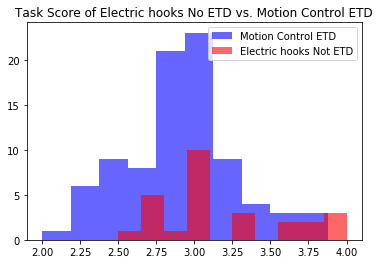

In [17]:
plt.hist(sht.TaskETD.dropna(), alpha=0.6, color='b', label = "Motion Control ETD")
plt.hist(sht.TaskElecNoETD.dropna(), alpha=0.6, color='r', label = "Electric hooks Not ETD")
plt.title("Task Score of Electric hooks No ETD vs. Motion Control ETD")
plt.legend()
plt.show()

The distribution for the not ETD electric hooks looks somewhat normal, however I would hold out for more data before I make a call.

## Multi-articulating hands
### vs. Single Grip hands

In [18]:
print("The hands in the multi-articulating group are {0}".format(electricHandMA))
print()
print("The hands in the single grip group are {0}".format(electricHandSG))
print()
print("The average score on Task for the multi-articulating is {0}".format(sht.TaskMA.dropna().mean()))
print("The average score on Task for the single grip is {0}".format(sht.TaskElecSG.dropna().mean()))
print()
print(stats.ttest_ind(sht.TaskMA.dropna(), sht.TaskElecSG.dropna()))

The hands in the multi-articulating group are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The hands in the single grip group are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The average score on Task for the multi-articulating is 3.0281362007168475
The average score on Task for the single grip is 3.099134736676127

Ttest_indResult(statistic=-2.2412490757044687, pvalue=0.02525828412486637)


The higher score on the single grip hands is significant.  We did not see this result on the normalized opus.

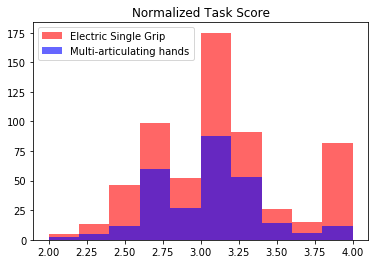

In [38]:
plt.hist(sht.TaskElecSG.dropna(), alpha=0.6, color='r', label = "Electric Single Grip")
plt.hist(sht.TaskMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.title("Normalized Task Score")
plt.legend()
plt.show()

### vs. Body Powered

In [20]:
print("The hands in the multi-articulating group are {0}".format(electricHandMA))
print()
print("The hands in the body powered group are {0}".format(bodyPoweredHooks))
print()
print("The average score on Task for the multi-articulating is {0}".format(sht.TaskMA.dropna().mean()))
print("The average score on Task for body powered is {0}".format(sht.TaskBPHook.dropna().mean()))
print()
print(stats.ttest_ind(sht.TaskMA.dropna(), sht.TaskBPHook.dropna()))

The hands in the multi-articulating group are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The hands in the body powered group are ['TRS Hook', 'Hosmer Hook', 'Body-powered Hand']

The average score on Task for the multi-articulating is 3.0281362007168475
The average score on Task for body powered is 2.969659120478793

Ttest_indResult(statistic=1.5934105785977839, pvalue=0.1117549718073446)


The higher score on the normalized ask by the multi-articulating hands is significant.

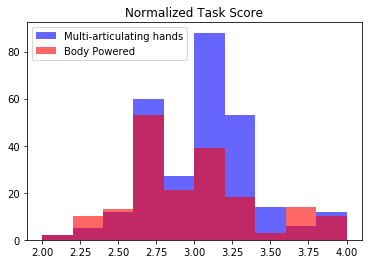

In [39]:
plt.hist(sht.TaskMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.hist(sht.TaskBPHook.dropna(), alpha=0.6, color='r', label = "Body Powered")
plt.title("Normalized Task Score")
plt.legend()
plt.show()

# Check t-test analysis
The results from t-tests can sometimes lead to too many false positives, anova and Tukey's test accomadate for multiple comparisons.  So the below should be a validation of what was observed above.

## ANOVA
Use anova to make sure there is a difference in the means of at least one of the Task scores between the body powered, multi-articulating, single grip, and electric hooks

In [22]:
print("The body powered hooks are {0}".format(bodyPoweredHooks))
print()
print("The multi-articulating hands are {0}".format(electricHandMA))
print()
print("The single grip hands are {0}".format(electricHandSG))
print()
print("The electric hooks are {0}".format(electricHooks))

The body powered hooks are ['TRS Hook', 'Hosmer Hook', 'Body-powered Hand']

The multi-articulating hands are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The single grip hands are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The electric hooks are ['Motion Control (MC) ETD', 'Otto Bock Axon Hook', 'Otto Bock Greifer']


Now we'll run anova to check that there is a difference among the mean scores on Task of these 4 groups.

In [23]:
stats.f_oneway(sht.TaskBPHook.dropna(), sht.TaskMA.dropna(), sht.TaskElecSG.dropna(), sht.TaskEHo.dropna())

F_onewayResult(statistic=7.1306028233433931, pvalue=9.5281023784380089e-05)

We have have signficance at 0.05.

## Tukey
The below will display a graph and a table the table will tell us the mean difference, confidence intervals and if we can reject the null hypothesis at a 95% confidence level

In [24]:
TaskDf = pd.concat([sht['PrimaryTerminalDevice'], sht['normalizedTask']], axis=1, keys=['deviceCategory','normalizedTask'])
TaskDf["deviceCategory"] = TaskDf["deviceCategory"].replace([bodyPoweredHooks],"Body Powered")
TaskDf["deviceCategory"] = TaskDf["deviceCategory"].replace([electricHandMA], "Multi-articulating")
TaskDf["deviceCategory"] = TaskDf["deviceCategory"].replace([electricHandSG], "Single Grip")
TaskDf["deviceCategory"] = TaskDf["deviceCategory"].replace([electricHooks], "Electric Hooks")
TaskDf["deviceCategory"] = TaskDf["deviceCategory"].replace('Otto.*', "Electric Hooks", regex=True)
TaskDf["deviceCategory"] = TaskDf["deviceCategory"].replace('Other.*', np.nan, regex=True)
TaskDf["deviceCategory"] = TaskDf["deviceCategory"].replace('Pass.*', np.nan, regex=True)
#groups = TaskDf.groupby(TaskDf['deviceCategory']).groups
#TaskDf['deviceCategory'] = str(TaskDf['deviceCategory'])
TaskDf = TaskDf.dropna()
df = TaskDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)

group1,group2,meandiff,lower,upper,reject
Body Powered,Electric Hooks,-0.0167,-0.1451,0.1116,False
Body Powered,Multi-articulating,0.0585,-0.0475,0.1645,False
Body Powered,Single Grip,0.1295,0.0355,0.2235,True
Electric Hooks,Multi-articulating,0.0752,-0.0437,0.1942,False
Electric Hooks,Single Grip,0.1462,0.0378,0.2546,True
Multi-articulating,Single Grip,0.071,-0.0096,0.1516,False


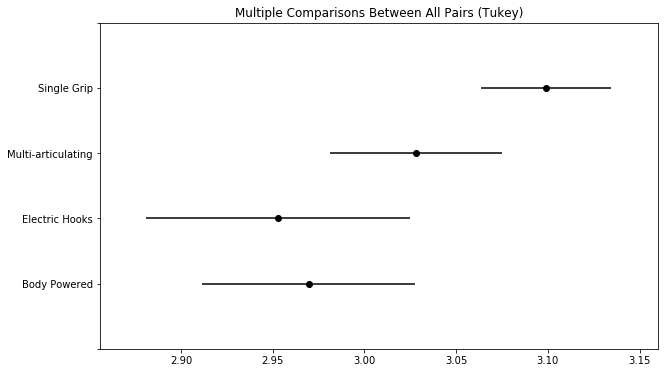

In [25]:
from ipykernel import kernelapp as app
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()           

We have slightly different results than what we saw on the T-tests.  We can no longer state that hands outperform hooks.  The Tukey test does confirm what we saw on the T-test regarding Single grip.  Single Grip hands did outperform Electric Hooks and Body Powered, however they did not outperform Multi-articulating, which the T-test stated.

Also of note, is that the performance on these 8 is more closely grouped than on opus, additionally the scores are lower.  I investigate this in another document.

## Significance among brands
I'm curious if we'll get something  by looking at the specific brands

group1,group2,meandiff,lower,upper,reject
Body-powered Hand,Hosmer Hook,0.4763,0.2364,0.7163,True
Body-powered Hand,Michelangelo Hand,0.1575,-0.0201,0.335,False
Body-powered Hand,Motion Control (MC) ETD,0.0266,-0.165,0.2181,False
Body-powered Hand,Motion Control (MC) Hand,0.2341,0.0979,0.3703,True
Body-powered Hand,Other (please specify),0.045,-0.9488,1.0387,False
Body-powered Hand,Otto Bock Axon Hook,0.3017,0.0077,0.5956,True
Body-powered Hand,Otto Bock Hand,0.2758,0.1093,0.4424,True
Body-powered Hand,Otto BockGreifer,0.1479,-0.2437,0.5395,False
Body-powered Hand,Passive Hand,0.2517,-0.117,0.6205,False
Body-powered Hand,TRS Hook,-0.23,-1.2238,0.7637,False


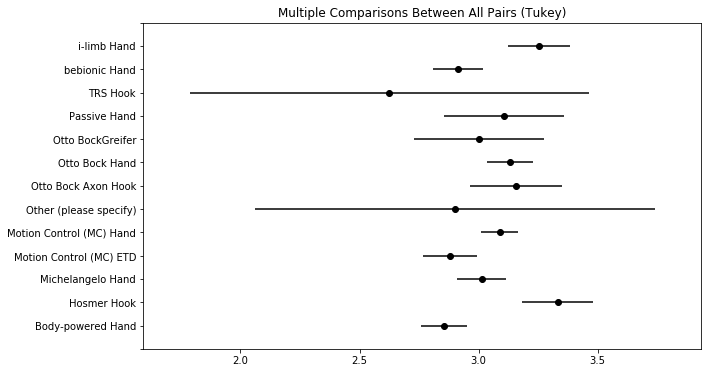

In [26]:
TaskDf = pd.concat([sht['PrimaryTerminalDevice'], sht['normalizedTask']], axis=1, keys=['deviceCategory','normalizedTask'])
TaskDf = TaskDf.dropna()
df = TaskDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary() 

The TRS Hook and "other" are mucking up the scale, let's remove those

group1,group2,meandiff,lower,upper,reject
Body-powered Hand,Hosmer Hook,0.4763,0.2431,0.7096,True
Body-powered Hand,Michelangelo Hand,0.1575,-0.0152,0.3301,False
Body-powered Hand,Motion Control (MC) ETD,0.0266,-0.1596,0.2128,False
Body-powered Hand,Motion Control (MC) Hand,0.2341,0.1016,0.3665,True
Body-powered Hand,Otto Bock Axon Hook,0.3017,0.0159,0.5874,True
Body-powered Hand,Otto Bock Hand,0.2758,0.1139,0.4377,True
Body-powered Hand,Otto BockGreifer,0.1479,-0.2328,0.5286,False
Body-powered Hand,Passive Hand,0.2517,-0.1068,0.6102,False
Body-powered Hand,bebionic Hand,0.0582,-0.118,0.2344,False
Body-powered Hand,i-limb Hand,0.3998,0.1908,0.6088,True


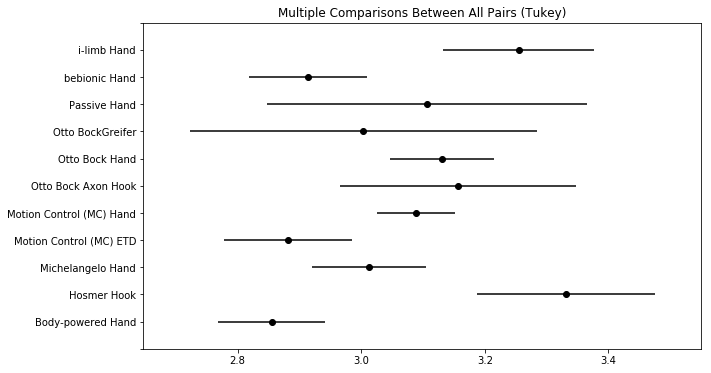

In [27]:
TaskDf = pd.concat([sht['PrimaryTerminalDevice'], sht['normalizedTask']], axis=1, keys=['primaryTD','normalizedTask'])
TaskDf["primaryTD"] = TaskDf["primaryTD"].replace('Other.*', np.nan, regex=True)
TaskDf["primaryTD"] = TaskDf["primaryTD"].replace('TRS.*', np.nan, regex=True)
TaskDf = TaskDf.dropna()
df = TaskDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary() 

I really like the above graph, it tells us a lot of information the bands are 95% confidence intervals and the dots are the means.  If the bands are narrow, then the brand probably has a lot more data.

Unfortunately the ETD has narrow bands and is on the lower end of the score.  It is interesting to note that on both the normalized opus and the normalized task, the bebionic hand and the ETD performed similarly.  I was curious about this so I performed some further analysis.

But before that I included a chart below that contains all the brands their score on the Normalized Opus, Normalized Task and the number of respondents included for that brand.

In [30]:
groupbyPrimaryDNT = sht["normalizedTask"].groupby(sht["PrimaryTerminalDevice"])
groupbyPrimaryDNO = sht["normalizedOpus"].groupby(sht["PrimaryTerminalDevice"])
sortedNT = groupbyPrimaryDNT.mean().sort_values(ascending=False)
sortedNO = groupbyPrimaryDNO.mean().sort_values(ascending=False)
pd.concat([sortedNO, sortedNT, groupbyPrimaryDNT.count()], axis=1, keys=['Normalized Opus', 'Normalized Task', 'Count']).sort_values(['Normalized Opus', 'Normalized Task'], ascending=False)

,Normalized Opus,Normalized Task,Count
Hosmer Hook,3.408458,3.331376,45
i-limb Hand,3.397015,3.254859,61
Otto BockGreifer,3.394602,3.002976,14
Other (please specify),3.384615,2.900000,2
Michelangelo Hand,3.326328,3.012495,113
Otto Bock Axon Hook,3.282110,3.156702,27
Otto Bock Hand,3.262560,3.130862,145
Passive Hand,3.253799,3.106771,16
Motion Control (MC) Hand,3.199094,3.089112,459
Motion Control (MC) ETD,2.988510,2.881623,87


There is a distinct jump in scores between Motion Control hand and the ETD.  Further bebionic and ETD have very similar scores, let's investigate

In [40]:
print("The summary stats for the ETD are")
print(sht.numberTasksUseProsthesisTask[sht['PrimaryTerminalDevice']=='Motion Control (MC) ETD'].dropna().describe())
print()
print("The summary stats for the bebionic are")
print(sht.numberTasksUseProsthesisTask[sht['PrimaryTerminalDevice']== 'bebionic Hand'].dropna().describe())

The summary stats for the ETD are
count    89.000000
mean      4.876404
std       1.958781
min       0.000000
25%       4.000000
50%       4.000000
75%       6.000000
max       8.000000
Name: numberTasksUseProsthesisTask, dtype: float64

The summary stats for the bebionic are
count    106.000000
mean       6.735849
std        2.089894
min        0.000000
25%        5.000000
50%        8.000000
75%        8.000000
max        8.000000
Name: numberTasksUseProsthesisTask, dtype: float64


Lots of bebionic users!

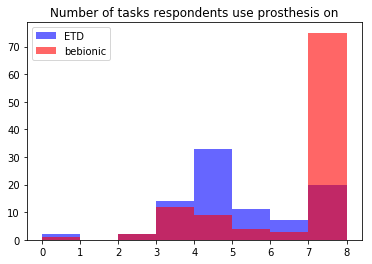

In [41]:
plt.hist(sht.numberTasksUseProsthesisTask[sht['PrimaryTerminalDevice']=='Motion Control (MC) ETD'].dropna(), alpha=0.6, color='b', label = "ETD", bins=8)
plt.hist(sht.numberTasksUseProsthesisTask[sht['PrimaryTerminalDevice']== 'bebionic Hand'].dropna(), alpha=0.6, color='r', label = "bebionic", bins=8)
plt.title("Number of tasks respondents use prosthesis on")
plt.legend()
plt.show()

ETD wearers again are only using device on about half of the tasks!  This is what is bringing this score down.